# Methane Emissions in Countries

This project analyzes two datasets - one containing information on countries' emissions by energy type and region, and the other providing population data by country. Using Python and popular libraries like NumPy, Matplotlib, Seaborn, and Pandas, we will combine and analyze these datasets to identify patterns and trends.

#### **Why this topic?**

The topic of methane emissions is critical because methane is one of the most potent greenhouse gases, with a potency 80 times greater than carbon dioxide. It is vital to understand the sources and areas with the highest emissions to find effective ways to combat climate change. Methane emissions mainly originate from agriculture, fossil fuels, energy, waste, and other sources. It's worth noting that the data trends observed within the methane data may differ from the total amount of greenhouse gas emissions, which are primarily based on carbon dioxide. We aim to demonstrate this difference through the diagrams and questions presented throughout the project.



## Downloading the Dataset

Here, the dataset is downloaded from Kaggle public databases.

In [2]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url1 = 'https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions'
dataset_url2 =  "https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset"

In [3]:
import opendatasets as od
od.download(dataset_url1)
od.download(dataset_url2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading global-methane-emissions.zip to .\global-methane-emissions


100%|██████████| 31.0k/31.0k [00:00<00:00, 141kB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle Key:Downloading world-population-dataset.zip to .\world-population-dataset


100%|██████████| 15.7k/15.7k [00:00<00:00, 15.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './global-methane-emissions'

In [5]:
import os
os.listdir(data_dir)

['Methane_final.csv']

## Data Preparation and Cleaning

The data will be prepared for many usages, and the previous databases will additionally be combined. Extra data would be cleaned.



In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
methane_df = pd.read_csv('global-methane-emissions/Methane_final.csv')
#reading first methane dataframe

Cleaning methane data by removing unnecessary columns:

In [9]:
methane_df.drop('notes', axis=1, inplace=True)
#dropping notes (source information), which is unnecessary

In [10]:
methane_df.drop('baseYear', axis=1, inplace=True)
#dropping year of notes, unnecessary

In [11]:
methane_df.drop('reason', axis=1, inplace=True)
#reason for methane emissions is unnecessary

In [12]:
methane_df.drop('Unnamed: 0', axis=1, inplace=True)
#indexes, which are not needed

In [13]:
methane_df

,region,country,emissions,type,segment
0,Africa,Algeria,257.611206,Agriculture,Total
1,Africa,Algeria,0.052000,Energy,Bioenergy
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities
4,Africa,Algeria,213.987000,Energy,Onshore gas
...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions
1544,World,World,30296.500000,Energy,Steam coal
1545,World,World,133350.984375,Energy,Total
1546,World,World,9737.874023,Other,Total


In [14]:
methane_df.shape

(1548, 5)

In [15]:
methane_df.describe()

,emissions
count,1548.000000
mean,643.255972
std,5566.238201
min,0.000459
25%,2.659361
50%,24.064669
75%,128.419594
max,141953.765625


**Removing World Data**

In [16]:
#remove data that contains world information which can be useful later
methane_df_no_world = methane_df[methane_df['region']!='World']

In [17]:
methane_df_no_world

,region,country,emissions,type,segment
0,Africa,Algeria,257.611206,Agriculture,Total
1,Africa,Algeria,0.052000,Energy,Bioenergy
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities
4,Africa,Algeria,213.987000,Energy,Onshore gas
...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total


**Population Databases**

In [18]:
pop = pd.read_csv('world-population-dataset/world_population.csv')
#get population

In [19]:
pop = pop.drop(columns=[col for col in pop.columns if col not in ['Country/Territory', '2022 Population']])
#drop all unnecessary columns except for two (there's a lot of them)

In [20]:
pop.rename(columns={'Country/Territory':'country','2022 Population':'population'},inplace=True)
#rename columns to be easier to merge to other database

In [21]:
pop

,country,population
0,Afghanistan,41128771
1,Albania,2842321
2,Algeria,44903225
3,American Samoa,44273
4,Andorra,79824
...,...,...
229,Wallis and Futuna,11572
230,Western Sahara,575986
231,Yemen,33696614
232,Zambia,20017675


**Integrating Population into Original Database**

In [22]:
pop_methane_df = pd.merge(methane_df_no_world.groupby(['country', 'region']).sum().reset_index(),pop, on='country', how='left')
#first sum all the countries by region together in the methane dataframe without a world
#reset its index
# merge the databases on the modified methane dataframe on country 

In [ ]:
pop_methane_df

,country,region,emissions,population
0,Algeria,Africa,6113.441756,44903225.0
1,Angola,Africa,1771.640266,35588987.0
2,Argentina,Central and South America,6558.256740,45510318.0
3,Australia,Asia Pacific,7775.794053,26177413.0
4,Azerbaijan,Russia & Caspian,946.942928,10358074.0
...,...,...,...,...
99,Uruguay,Central and South America,908.923504,3422794.0
100,Uzbekistan,Russia & Caspian,2747.778754,34627652.0
101,Venezuela,Central and South America,6691.244875,28301696.0
102,Vietnam,Asia Pacific,3133.670373,98186856.0


In [23]:
largest_emitters = pop_methane_df.groupby('region')['emissions'].idxmax()
# get indexes of largest emitters

In [24]:
# group the data by region and find the index of the largest emitter within each group

# create a new dataframe with the largest emitter for each region
largest_emitters_df = pop_methane_df.loc[largest_emitters, ['region', 'country', 'emissions']]

# get the countries with the largest emissions in each region
largest_emitting_countries = list(largest_emitters_df['country'])

# print the list of countries
print(largest_emitting_countries)

['Nigeria', 'China', 'Brazil', 'European Union', 'Iran', 'United States', 'Other', 'Russia']


## Exploratory Analysis and Visualization

In this section, multiple aspects of the data will be analyzed and visualized.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Basic Description**

In [26]:
pop_methane_df.describe()

,emissions,population
count,104.000000,9.400000e+01
mean,4871.230079,7.358465e+07
std,10851.792936,2.095109e+08
min,2.621898,1.071180e+05
25%,520.677552,5.654923e+06
50%,1437.557520,1.952863e+07
75%,3972.225176,5.348912e+07
max,81048.371586,1.425887e+09


# **Methane Emissions By Country Ranked**

In [27]:
#getting carbon emissions per country sorted
country_emissions = methane_df_no_world.groupby('country')['emissions'].sum().sort_values(ascending=False)

In [ ]:
country_emissions

country
China            81048.371586
United States    48604.877296
Russia           42432.929804
India            34852.007386
Brazil           21720.838126
                     ...     
Guinea-Bissau       87.772880
Slovenia            83.387466
Gambia              47.587691
Liberia             43.897755
Seychelles           2.621898
Name: emissions, Length: 104, dtype: float64

In [ ]:
print(f'Worldwide Methane Emissions in kilotons:{country_emissions.sum()}')

Worldwide Methane Emissions in kilotons:506607.92817170924


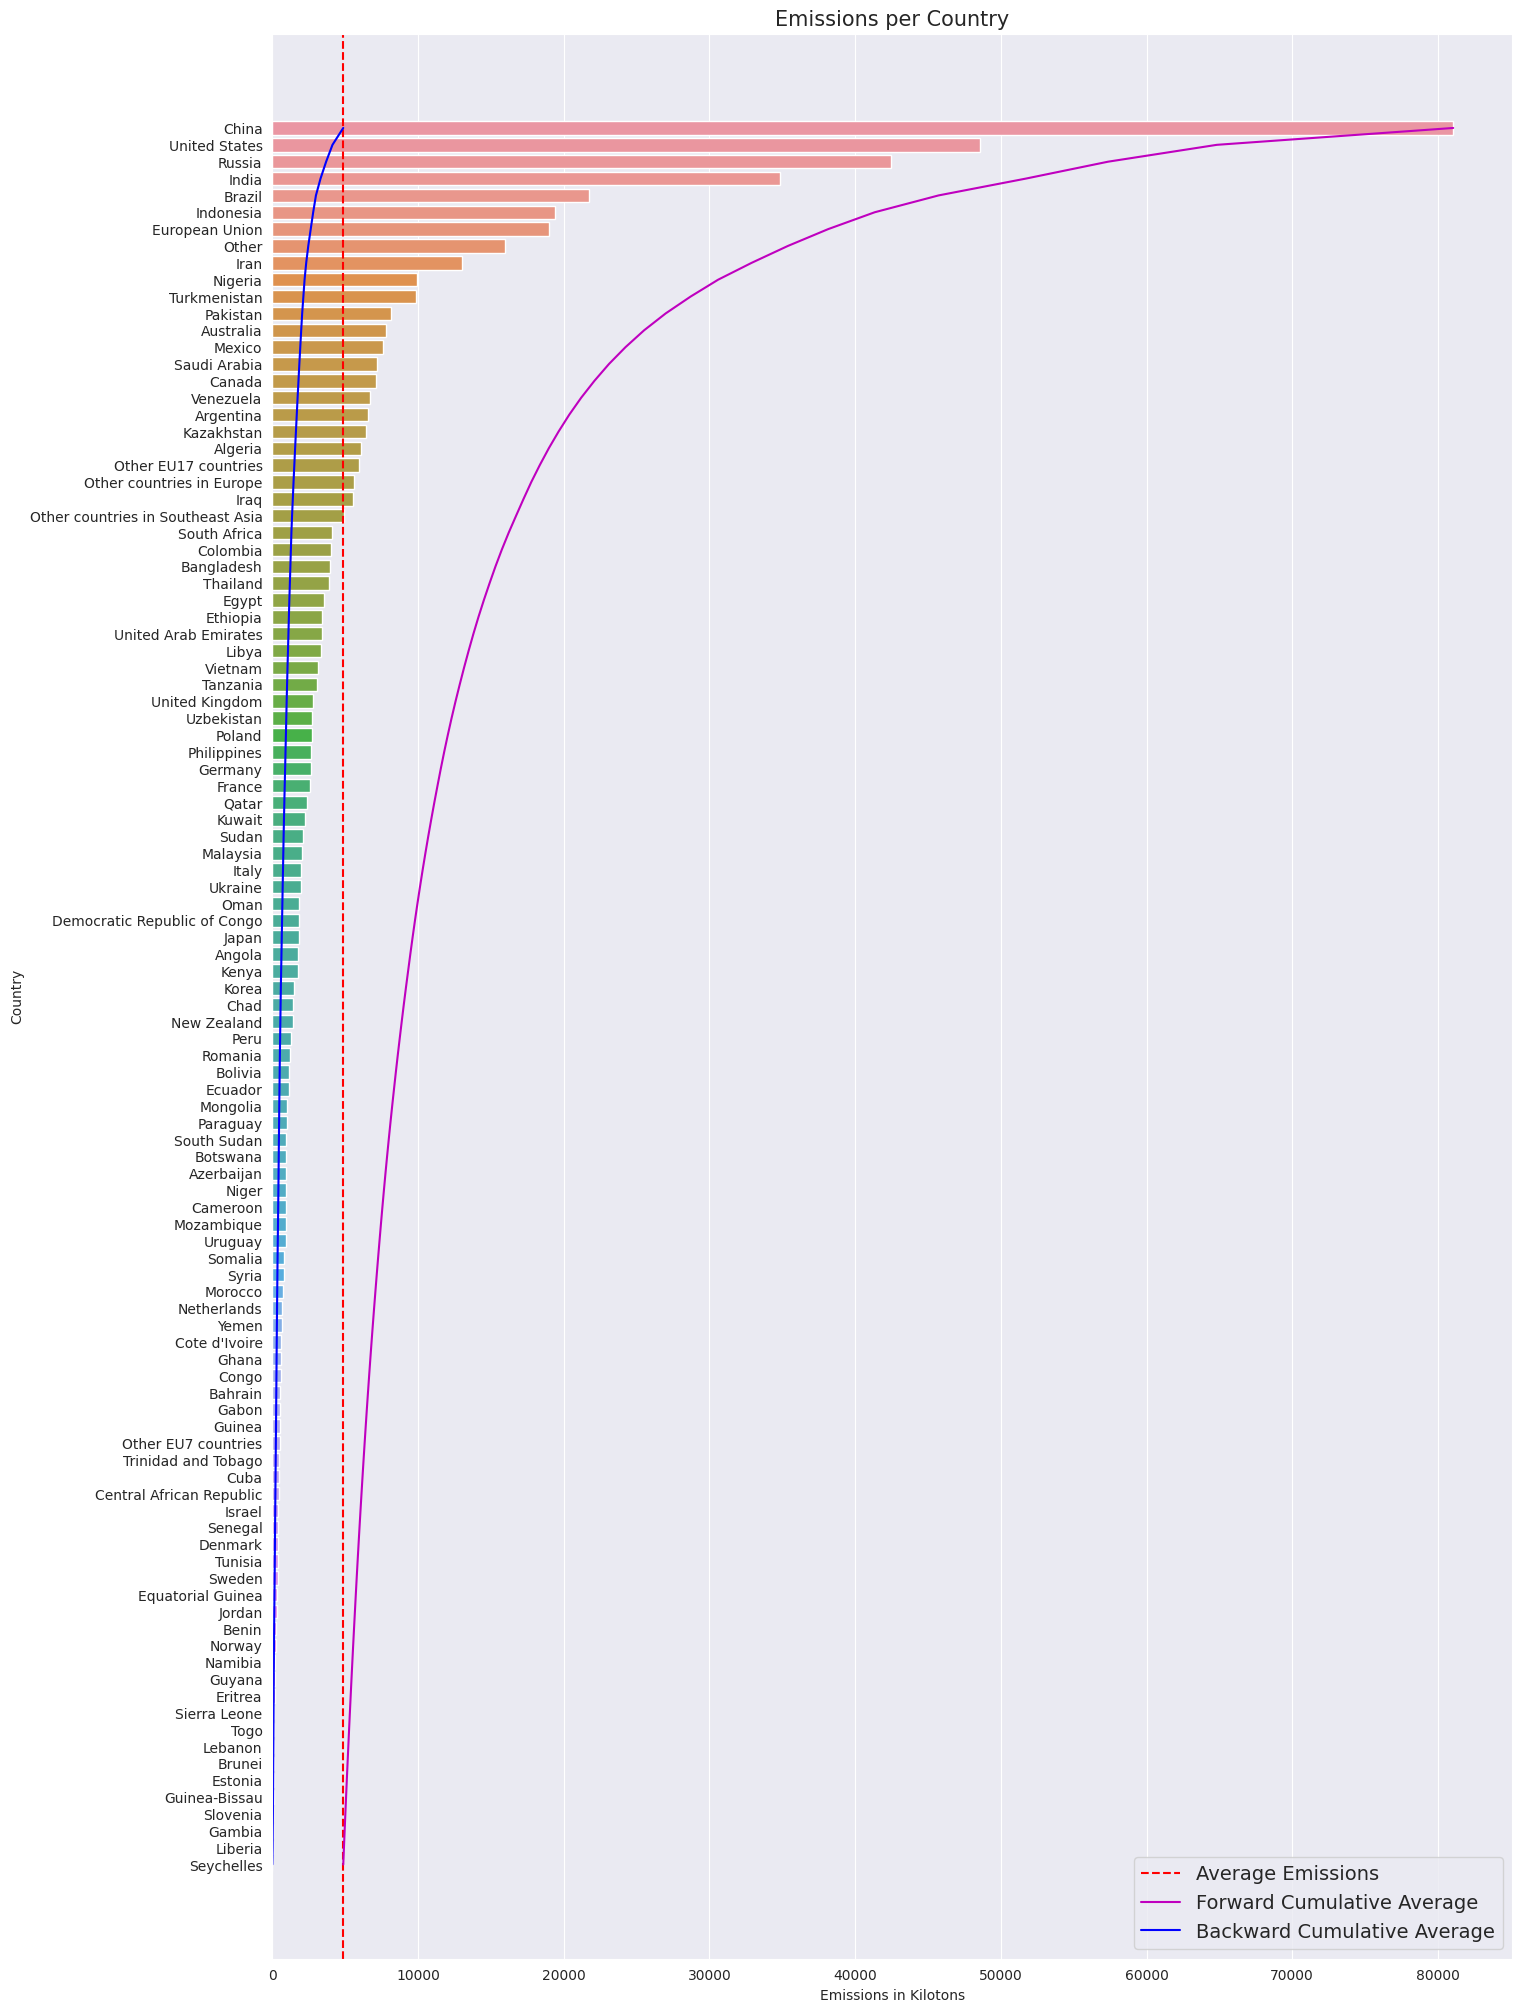

In [ ]:
# Calculate the cumulative sum of emissions in both directions
cumulative_sum_forward = country_emissions.cumsum()
cumulative_sum_backward = country_emissions.iloc[::-1].cumsum()[::-1]

# Calculate the cumulative average of emissions in both directions
cumulative_avg_forward = cumulative_sum_forward / np.arange(1, len(country_emissions)+1)
cumulative_avg_backward = cumulative_sum_backward / (np.arange(1, len(country_emissions)+1)[::-1])

# Plot the bar chart with the cumulative sum line
plt.figure(figsize=(16, 25))
sns.barplot(x=country_emissions, y=country_emissions.index)
plt.axvline(x=country_emissions.mean(), color='r', linestyle='--',  label='Average Emissions')
plt.plot(cumulative_avg_forward, cumulative_avg_forward.index, color='m', linestyle='-', label='Forward Cumulative Average')
plt.plot(cumulative_avg_backward, cumulative_avg_backward.index, color='b', linestyle='-', label='Backward Cumulative Average')
plt.xlabel('Emissions in Kilotons', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.title('Emissions per Country', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

**As expected, developed countries produce large amounts of methane emissions. It is also worth noting that the average methane emissions are significantly lower than those of some of the higher emitters. Forward and backward cumulative averages show how the data's moving average eventually approaches the overall average, although the backward average is much less smooth due to the more abrupt changes in the cumulative sum.**

In [ ]:
# Sum the methane emissions by country and region
grouped_methane = methane_df_no_world.groupby(['region', 'country'])['emissions'].sum().reset_index()
# Sort the data by region and emissions
grouped_methane = grouped_methane.sort_values(['region', 'emissions'], ascending=False)

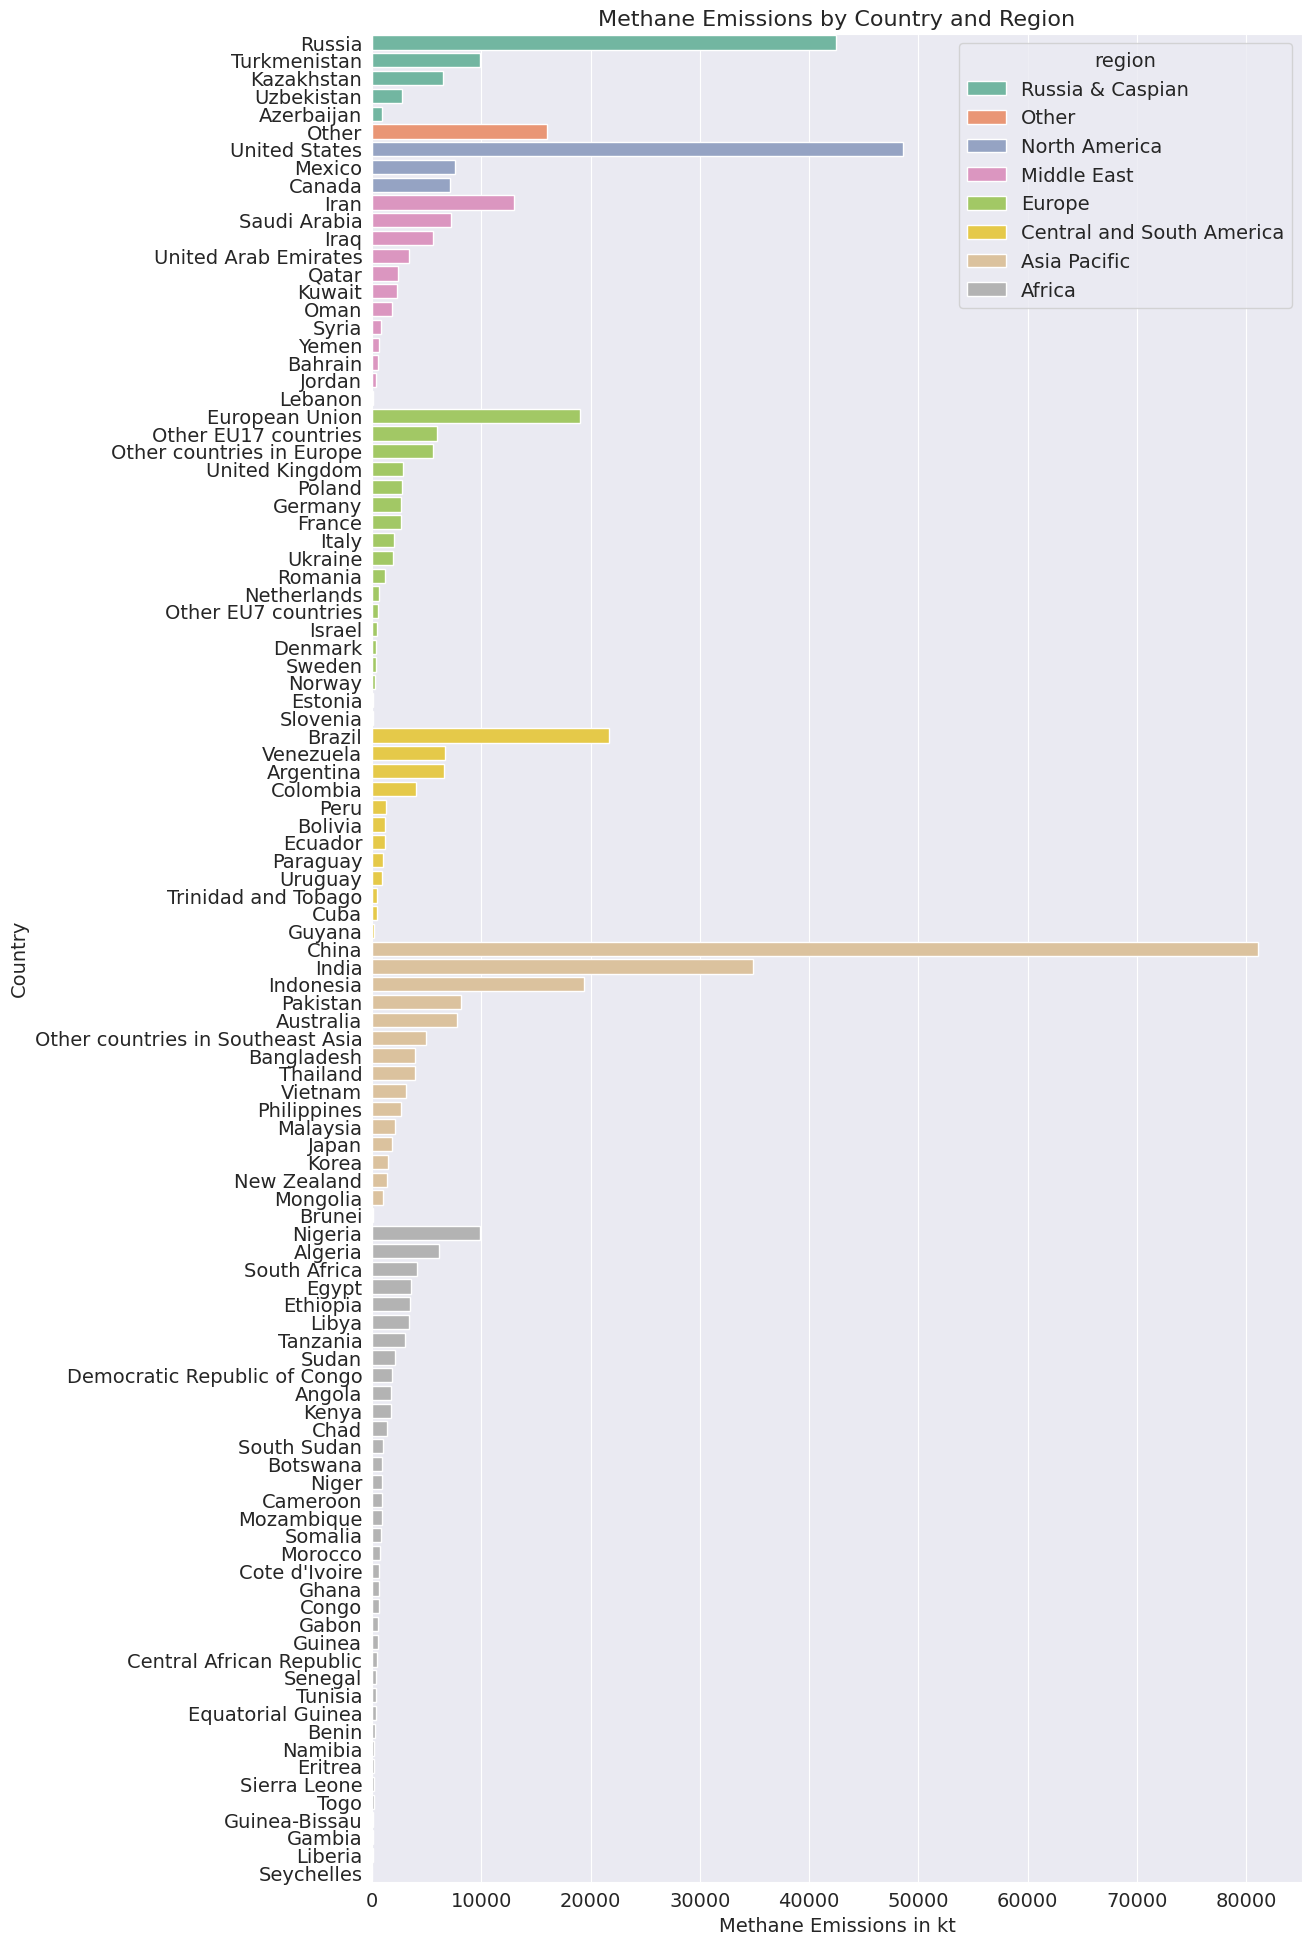

In [ ]:
# Define the plot size
plt.figure(figsize=(12, 24))
# Create the seaborn barplot
sns.barplot(data=grouped_methane, y='country', x='emissions', hue='region', palette='Set2', dodge=False)
# Add title and axes labels
plt.title('Methane Emissions by Country and Region', fontsize=16)
plt.xlabel('Methane Emissions in kt')
plt.ylabel('Country')
# Show the plot
plt.show()

**Significant amounts of data are missing from most regions, but there is notably more data available for Africa, which could result in data biases under emissions groupings. Some African countries have a decent amount of emissions, which may come from oil production. Brazil, Venezuela, and Argentina also produce large amounts of oil, resulting in high emissions. Surprisingly, Europe has relatively low methane emissions, while countries in Asia emit large amounts. This could be due to Europe's transition to renewable power, stronger environmental regulations, or fewer methane-spewing factories. As expected, the US and Russia rank high in emissions.**

# **Methane Emissions Histogram**

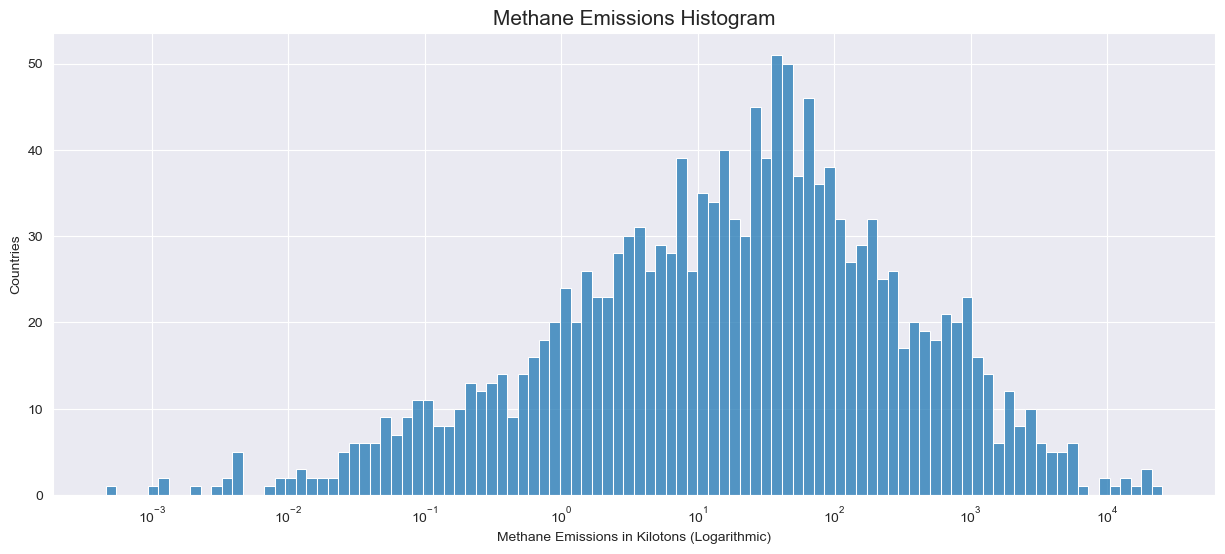

In [37]:
# Plot the logarithmic histogram based on emissions column
#yes, it's logarithmic to make it easier to see the data
#use seaborn histogram
plt.figure(figsize=(15, 6))
sns.histplot(methane_df_no_world['emissions'], bins=100, log_scale=True)
plt.xlabel('Methane Emissions in Kilotons (Logarithmic)', fontsize=10)
plt.ylabel('Countries', fontsize=10)
plt.title('Methane Emissions Histogram', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **Emissions by Region**

In [ ]:
emissions_by_region = methane_df_no_world.groupby('region')['emissions'].sum().sort_values(ascending=False)
#sum all emissions by the region then sort

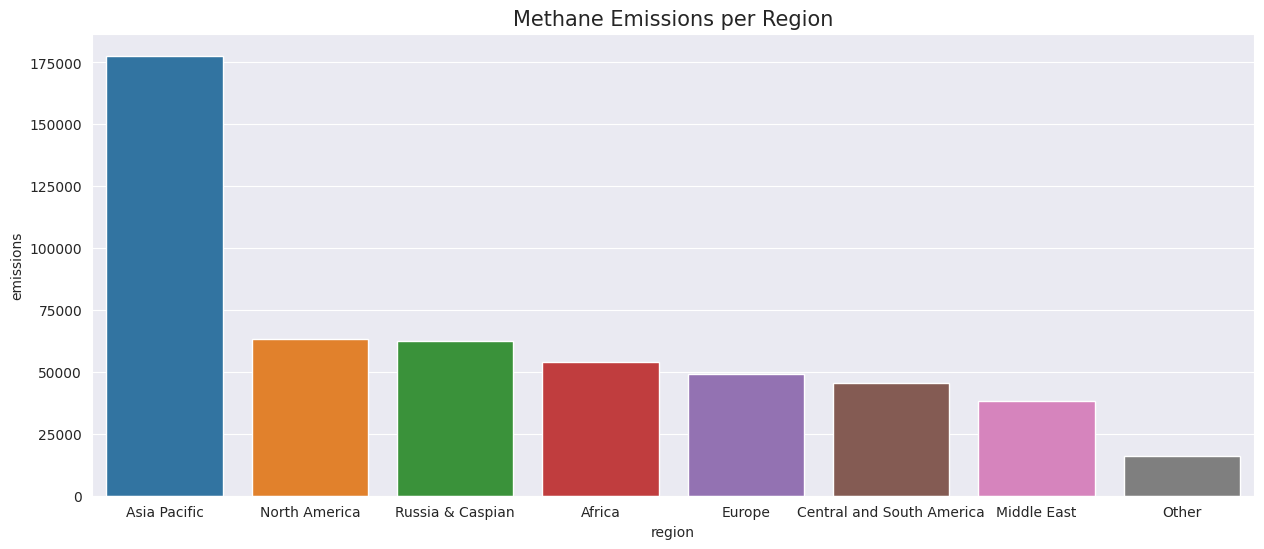

In [ ]:
# Establish figure size
plt.figure(figsize=(15, 6))
#labels
plt.xlabel("MethaneEmissions in Kilotons",fontsize=10);
plt.ylabel("Region",fontsize=10);
plt.title("Methane Emissions per Region",fontsize=15);
#fontsize modifications
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
#plotting
sns.barplot(y=emissions_by_region, x=emissions_by_region.index);

**As aforementioned, the data biases make Africa look like a large methane emitter. Surprisingly, Asia Pacific is a large methane emitter by a great margin, driven largely by China, India, and Indonesia, along with an overall high average of emissions there. Europe's emissions are quite low though, perhaps for the reasons I talked about earlier.**

# **Average Country Emissions per Region**

In [ ]:
avg_emissions_by_region = (methane_df_no_world.groupby('region')['emissions'].sum()/methane_df_no_world.groupby('region')['country'].nunique()).sort_values(ascending=False)
# Begin by grouping emissions by region then summing their emissions
# Then divide by the unique amount of countries within each reguin
# Then sort values

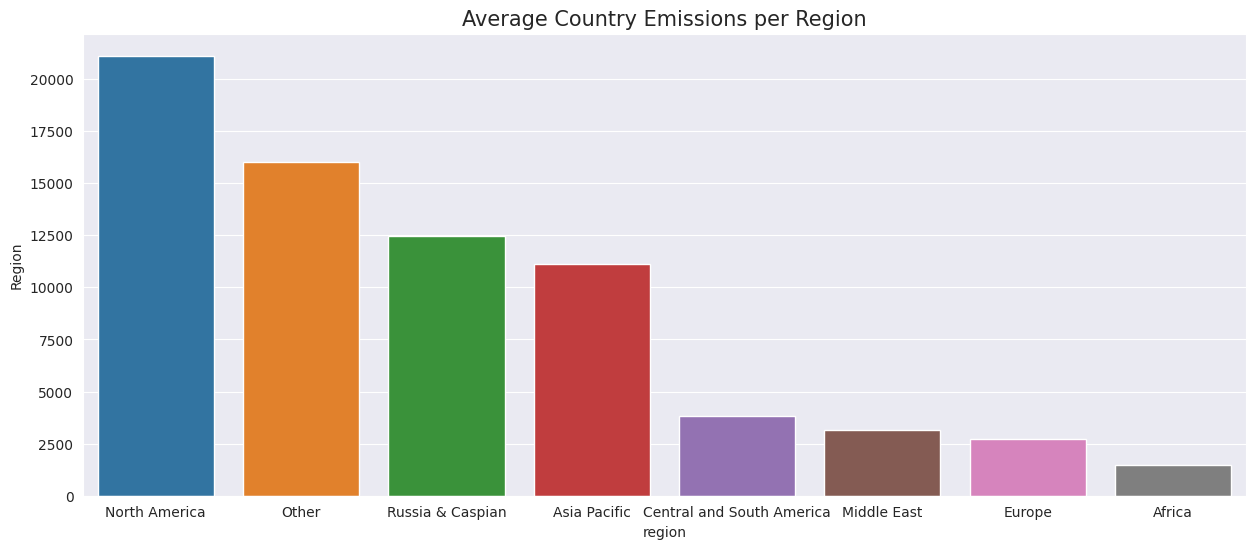

In [ ]:
#figure size
plt.figure(figsize=(15, 6))
#labels
plt.xlabel("Emissions in Kilotons",fontsize=10);
plt.ylabel("Region",fontsize=10);
plt.title("Average Country Emissions per Region",fontsize=15);
#font sizes
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
#bar plotting
sns.barplot(y=avg_emissions_by_region, x=avg_emissions_by_region.index);

**The US impacts the North America Average heavily. Europe again seems to be low in methane emissions, but this may be due to many European countries not in the EU that emit little emissions.**

# **Methane emissions by emitter type**

In [ ]:
methane_emissions_sector = methane_df_no_world.groupby('type').sum().reset_index().sort_values(by="emissions",ascending=False)
# Group the methane dataframe without world by type then sum them and reset the indexes
# sort the values by the emissions

In [ ]:
methane_emissions_sector

,type,emissions
1,Energy,270694.345156
0,Agriculture,150805.103144
3,Waste,75079.707008
2,Other,10028.772862


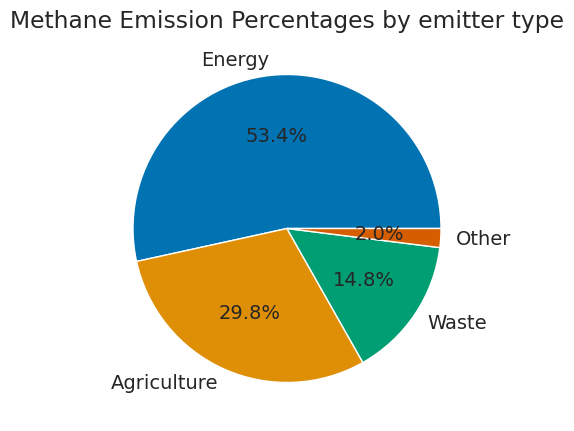

In [ ]:
#figure
plt.figure(figsize=(10,5));
#label
plt.title("Methane Emission Percentages by emitter type")
#pie chart
plt.pie(methane_emissions_sector['emissions'], labels=methane_emissions_sector['type'],colors = sns.color_palette('colorblind'), autopct='%1.1f%%');
#show
plt.show();

**Energy creates a significant percentage of methane emissions, but agriculture and waste also release large amounts of methane emmisions.**

# **Methane emissions by types of Energy**

In [ ]:
#methane based on purely energy aspects
energy_methane_df = methane_df[(methane_df['segment'] != 'Total')]

In [ ]:
sum_energy_methane = energy_methane_df.groupby('segment')['emissions'].sum().sort_values(ascending=False)

In [ ]:
sum_energy_methane

segment
Onshore oil                                       68564.743201
Steam coal                                        60343.773344
Onshore gas                                       36054.667397
Gas pipelines and LNG facilities                  24600.643844
Coking coal                                       20323.058074
Bioenergy                                         19134.448077
Offshore oil                                      16778.749738
Offshore gas                                       8685.836718
Satellite-detected large oil and gas emissions     6208.900007
Other from oil and gas                             4785.509486
Other from coal                                    3217.824070
Name: emissions, dtype: float64

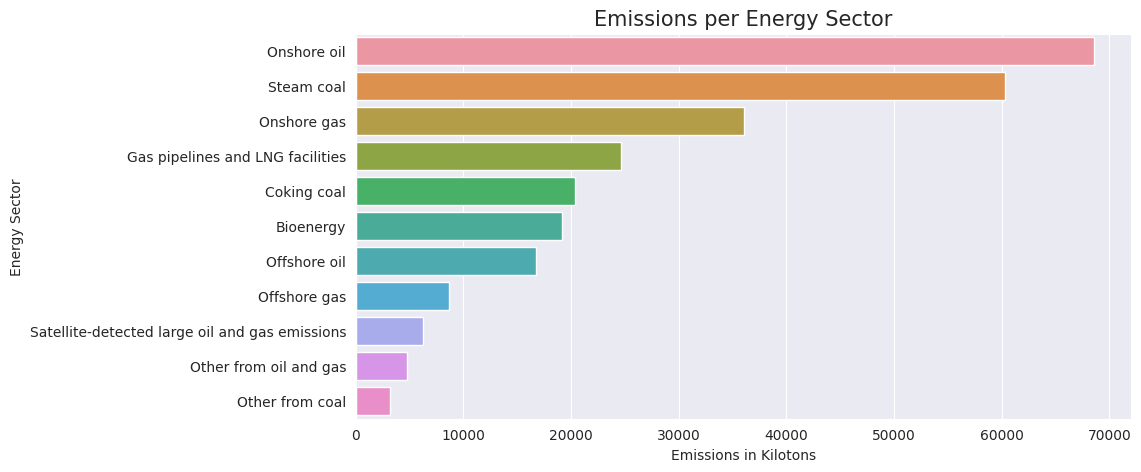

In [ ]:
#figure
plt.figure(figsize=(10,5));
#barplot
sns.barplot(x=sum_energy_methane, y=sum_energy_methane.index);
#Labels
plt.xlabel("Emissions in Kilotons",fontsize=10);
plt.ylabel("Energy Sector",fontsize=10);
plt.title("Emissions per Energy Sector",fontsize=15);
#sizes
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

**Oil,coal, and gas are significant sources of methane, while bioenergy still releases some share of it.**

# **Generalized Emissions per Energy Sector**

In [ ]:
# There are energy sectors that are repeated , such as oil, gas and coal
# Thus, these need to be filtered
def generalize_segment(segment):
    segment = segment.lower()
    #lowercase it to get rid of upper case
    oil = 'oil' in segment
    gas = 'gas' in segment
    coal = 'coal' in segment
    #checks what segments are there
    if oil and gas:
        #filters labels with both oil and gas
        return 'oil and gas'
    elif gas:
        #filters labels with gas
        return 'gas'
    elif oil:
        #filters labels with oil
        return 'oil'
    elif coal:
        #filters labels with coal
        return 'coal'
    else:
        #others
        return segment

In [ ]:
general_energy_methane = sum_energy_methane.copy()
#make copy

In [ ]:
general_energy_methane = general_energy_methane.rename(index=generalize_segment)
#generalize the indexes
general_energy_methane=general_energy_methane.groupby(general_energy_methane.index).sum().sort_values(ascending=False)
#then sum the indexes together

In [ ]:
general_energy_methane

segment
oil            85343.492940
coal           83884.655488
gas            69341.147960
bioenergy      19134.448077
oil and gas    10994.409493
Name: emissions, dtype: float64

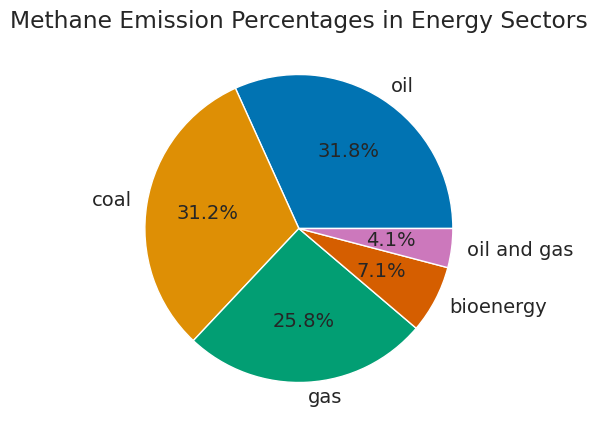

In [ ]:
#figure 
plt.figure(figsize=(10,5));
#title
plt.title("Methane Emission Percentages in Energy Sectors")
#pie chart
plt.pie(general_energy_methane, labels=general_energy_methane.index,colors = sns.color_palette('colorblind'), autopct='%1.1f%%');
plt.show();

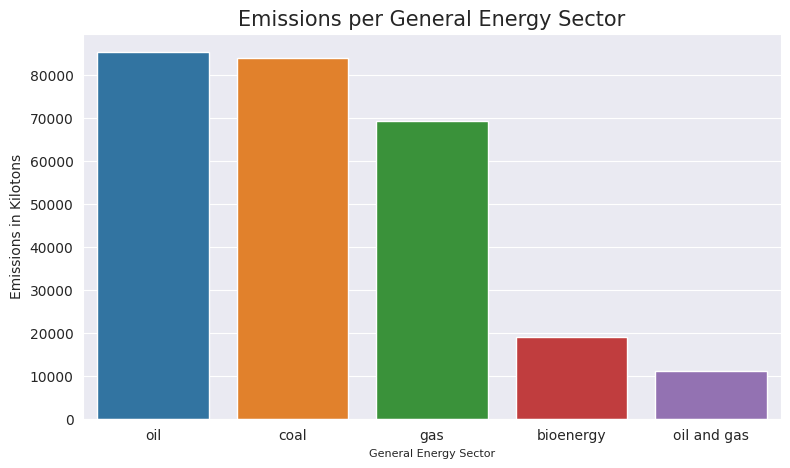

In [ ]:
#barplot
sns.barplot(y=general_energy_methane, x=general_energy_methane.index);
#labels
plt.ylabel("Emissions in Kilotons",fontsize=10);
plt.xlabel("General Energy Sector",fontsize=8);
plt.title("Emissions per General Energy Sector",fontsize=15);
#fontsizes
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

**Oil, coal, and gas, as seen, are the main emitters of the energy sector.**

# **Emission to Population Ratio**

In [ ]:
emissions_per_person=pop_methane_df['emissions']/pop_methane_df['population'].sort_values(ascending=False)
# divide emissions by population

In [ ]:
emissions_per_person.index=pop_methane_df['country']
#set indexes to the countries

In [ ]:
emissions_per_person.sort_values(ascending=False,inplace=True)
#sort

In [ ]:
emissions_per_person = emissions_per_person.dropna()
#drop NaN values

Sorry Congo, Cote d'Ivoire, Democratic Republic of Congo, and Korea. The data was corrupted to NaN so they had to be dropped. 

In [ ]:
# Calculate the cumulative sum of EPP (emissions per person) in both directions
EPP_cumulative_sum_forward = emissions_per_person.cumsum()*1000
EPP_cumulative_sum_backward = emissions_per_person.iloc[::-1].cumsum()[::-1]*1000

# Calculate the cumulative average of EPP  in both directions
EPP_cumulative_avg_forward = EPP_cumulative_sum_forward / np.arange(1, len(emissions_per_person)+1)
EPP_cumulative_avg_backward = EPP_cumulative_sum_backward / (np.arange(1, len(emissions_per_person)+1)[::-1])

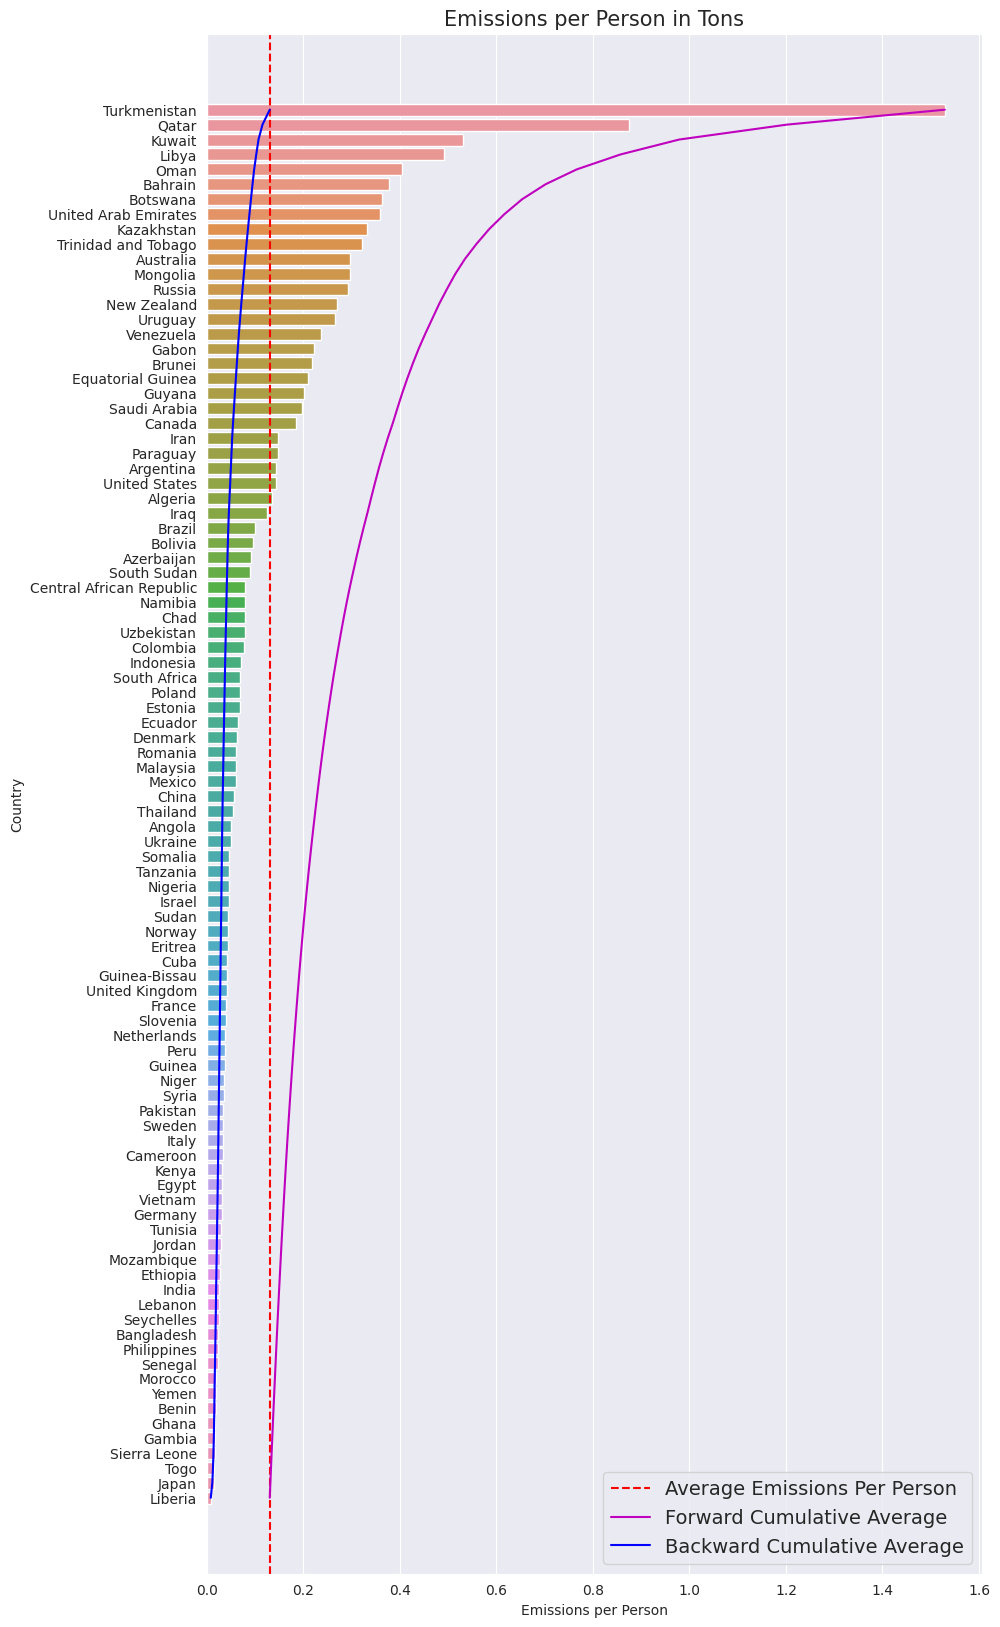

In [ ]:
#figure
plt.figure(figsize=(10,20));
#plotting
sns.barplot(x=emissions_per_person*1000, y=emissions_per_person.index);
#vertical average line
plt.axvline(x=emissions_per_person.mean()*1000, color='r', linestyle='--',  label='Average Emissions Per Person')
#plotting cumsum lines
plt.plot(EPP_cumulative_avg_forward, EPP_cumulative_avg_forward.index, color='m', linestyle='-', label='Forward Cumulative Average')
plt.plot(EPP_cumulative_avg_backward, EPP_cumulative_avg_backward.index, color='b', linestyle='-', label='Backward Cumulative Average')
#labels
plt.xlabel("Emissions per Person",fontsize=10);
plt.ylabel("Country",fontsize=10);
plt.title("Emissions per Person in Tons",fontsize=15);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
#show legend
plt.legend();

**Total emissions per country paint a different picture compared to average emissions per person. Middle Eastern countries release a large amount of methane, likely due to the need for heavy cooling in harsh temperatures. On the other hand, China and India have low emission per person due to their large populations and higher proportion of rural living.**

## Asking and Answering Questions

These questions will center on the relationship between population and emission and other data within regions.



### Q1: Is there a linear relationship between population and emissions?

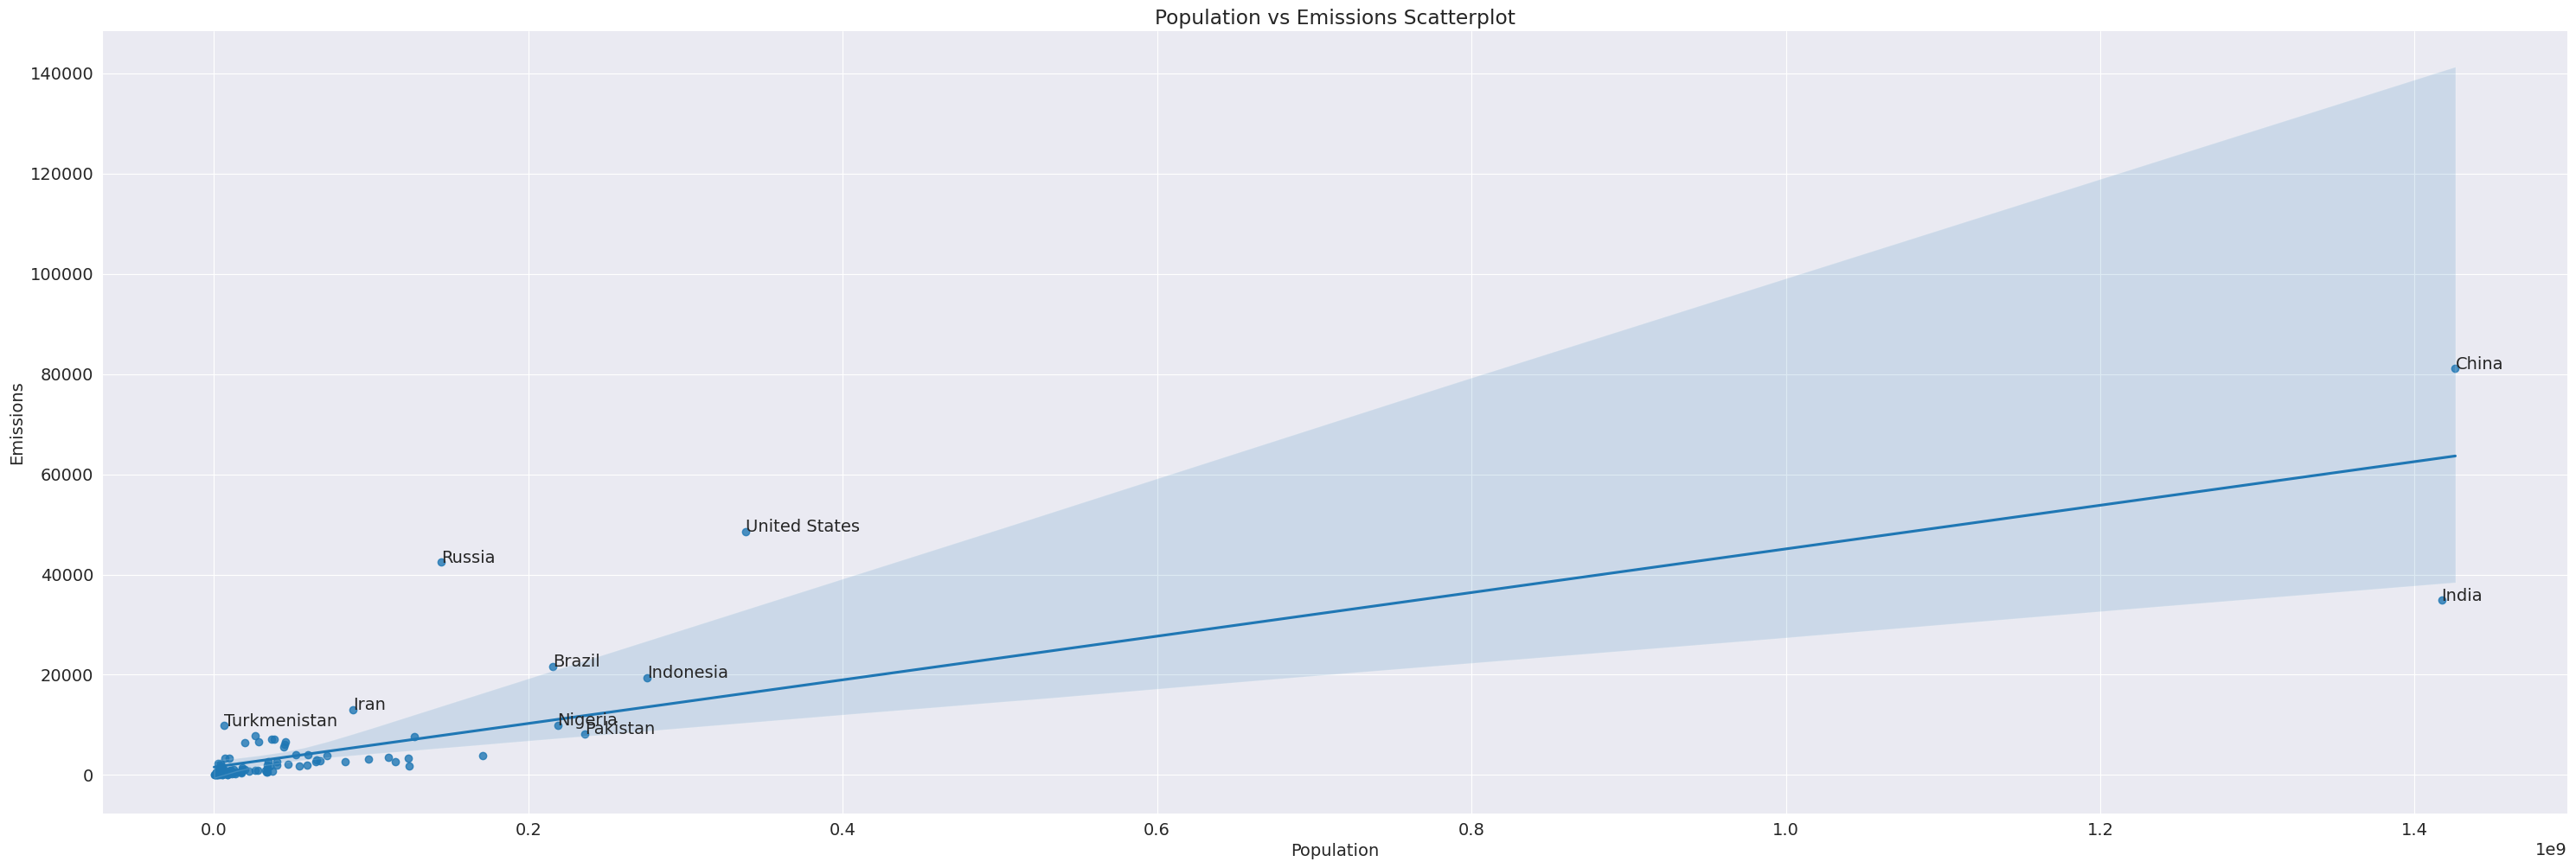

In [ ]:
# sort the dataframe by emissions in descending order
sorted_pop_emis_df = pop_methane_df.sort_values(by='emissions', ascending=False)

# create a scatterplot and linear regression line using Seaborn
g=sns.lmplot(x='population', y='emissions', data=sorted_pop_emis_df,height=10, aspect=3)
#labels
plt.xlabel('Population')
plt.ylabel('Emissions')
plt.title('Population vs Emissions Scatterplot')
#get top 12 coutnries to label
top_pop_emis = sorted_pop_emis_df.head(12)

# go through the top_pop_emis
for i, row in top_pop_emis.iterrows():
    #annotating
    plt.annotate(row['country'], (row['population'], row['emissions']))

plt.show()

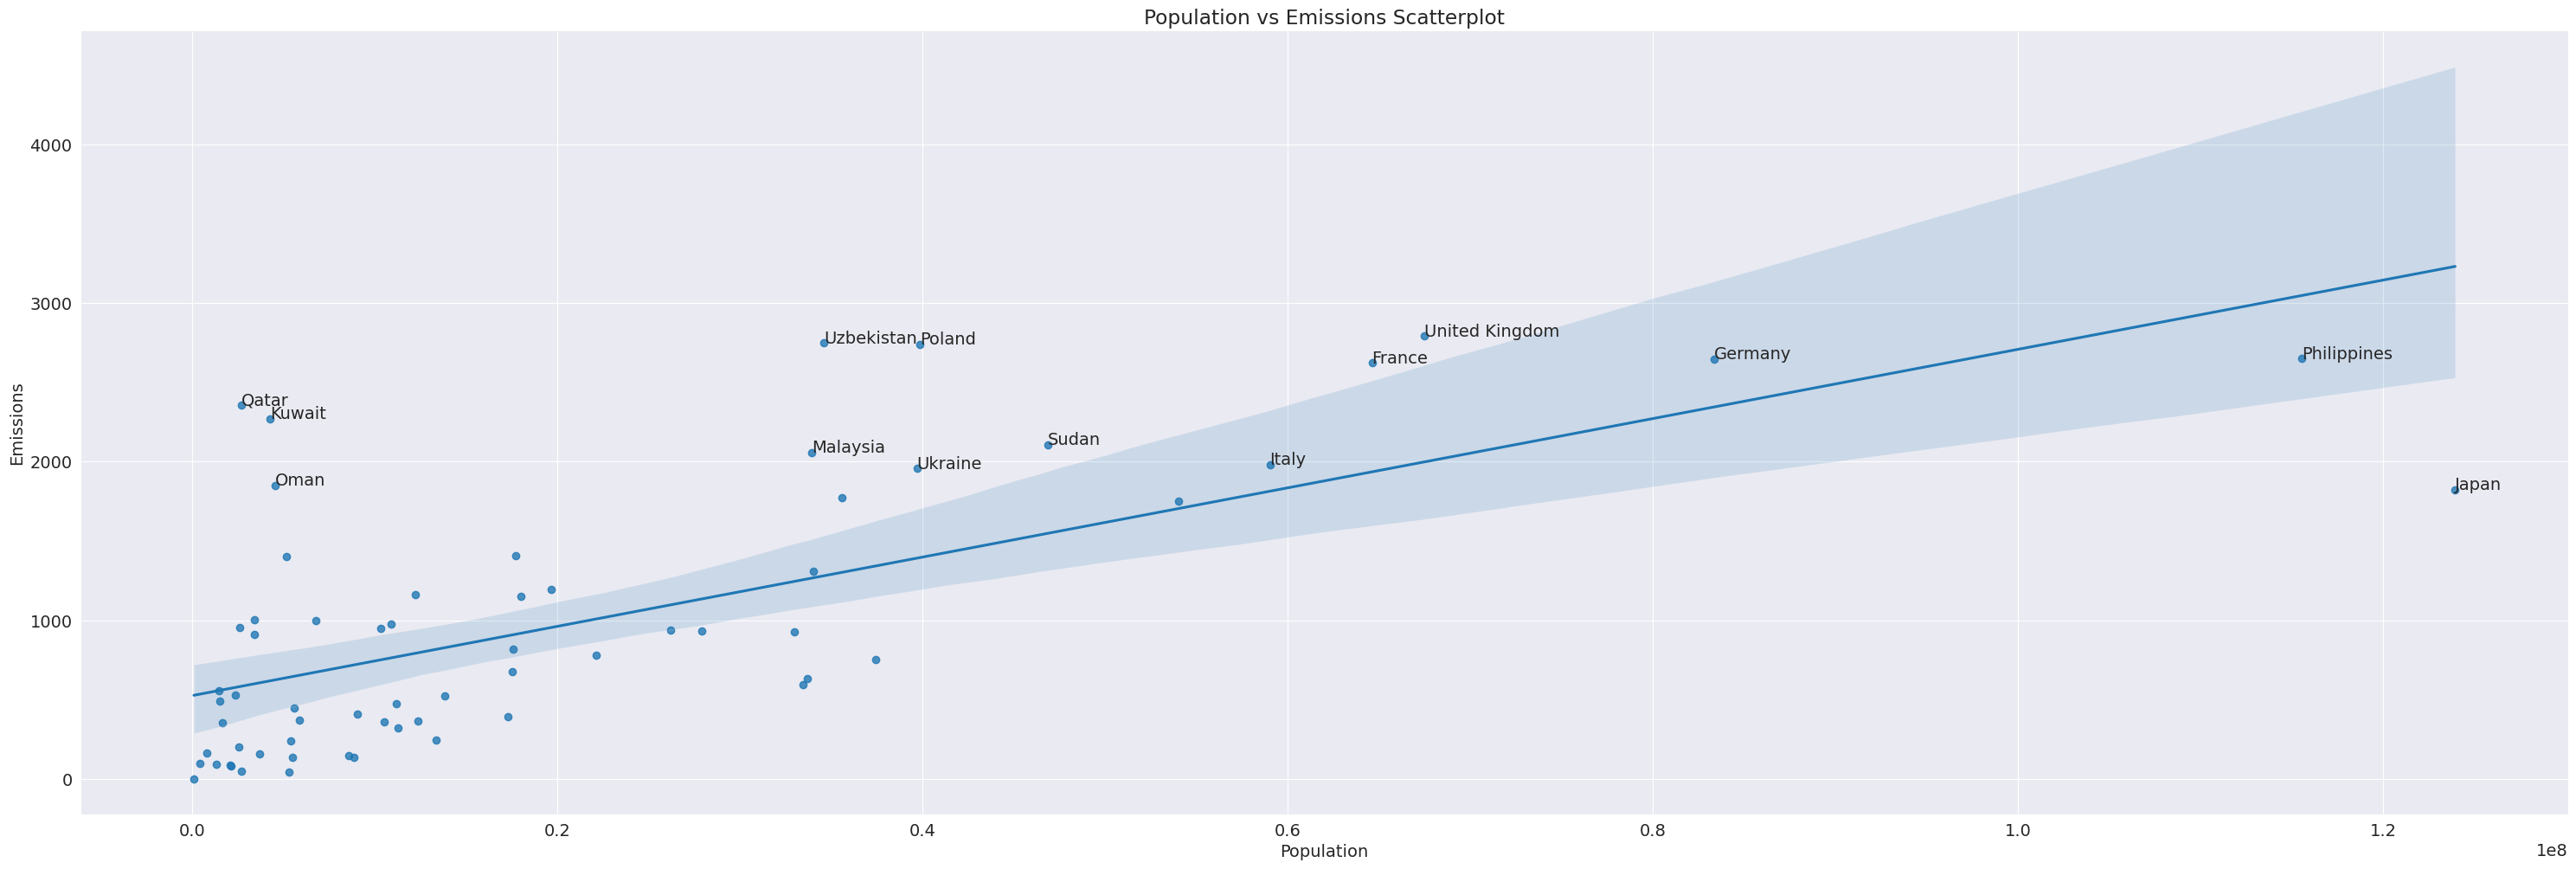

In [ ]:
#plotting for 70 lowest emitting countries
sns.lmplot(x='population', y='emissions', data=sorted_pop_emis_df.tail(70),height=10, aspect=3)
#labels
plt.xlabel('Population')
plt.ylabel('Emissions')
plt.title('Population vs Emissions Scatterplot')
#top 15 of bottom 70 emitting countries
top_pop_emis = sorted_pop_emis_df.tail(70).head(15)

# go through list
for i, row in top_pop_emis.iterrows():
    #annotate
    plt.annotate(row['country'], (row['population'], row['emissions']))

plt.show()

 **The scatterplot shows a clear positive correlation between population and emissions, with a few notable outliers such as Russia and the US. However, the strength of the correlation appears to weaken in countries with smaller emissions, suggesting that other factors beyond population size may be contributing significantly to methane emissions in these countries. Factors such as climate, economy, and lifestyle may play a more significant role in determining methane emissions in these countries."** 

### Q2: What is the deviation between the data and the linear regression?

In [ ]:
# calculate the parameters of the linear regression model
x = sorted_pop_emis_df['population'].values
y = sorted_pop_emis_df['emissions'].values
#remove all NaN values or infinity values
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)

# remove invalid values from x and y
x = x[mask]
y = y[mask]
# fit a linear regression model
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# calculate the residuals
y_pred = m * x + c
residuals = y - y_pred

# calculate the standard deviation of the residuals
std_dev = np.std(residuals)
print(y_pred)
print('Standard deviation of residuals: ', std_dev)

[63644.84660693 16309.11250477  7884.03986865 63265.5782125
 10956.78654087 13576.35461651  5439.65693717 11097.26701685
  1865.53959247 11849.50695465  2724.97689316  7135.04071262
  3170.28057412  3259.30760594  2817.43250941  3566.40698778
  2429.9149868   3539.98435133  3522.26592175  4192.4260026
  3843.37590382  9036.23234555  4706.13676744  6416.29745629
  6955.5422442   1996.56008102  1882.14678743  5859.05904155
  4436.32411178  4523.85747053  3092.75842425  3320.3627491
  6615.15091406  5214.17506521  4398.41017261  1702.95219807
  1771.44689417  3625.76768531  3062.75217369  4155.15224634
  3313.59898104  1784.82701717  6980.42742324  3134.59880986
  3937.10152735  2357.02740601  1811.33221716  3067.59922308
  2441.28625249  2117.684349    2369.11314872  1733.55963474
  1880.77158455  2060.62777024  1700.13076242  2036.4684713
  2726.30713657  2800.58206322  3020.59106555  1734.62281973
  2351.55201203  2548.61370626  3215.94299398  2350.09411504
  3052.23666136  3042.629173

**Despite a significant amount of standard deviation, it is still apparent that there is a correlation between population and emissions, although the linear graph may not be the most appropriate representation of this relationship. The presence of a notable deviation from the regression line in the scatterplot suggests that factors beyond population size may be influencing methane emissions in some countries, or a different model that better fits the pattern may be more appropriate.**

### Q3: What is the Pearson product-moment correlation coefficients  between emissions and population?

In [ ]:
#Pearson product-moment correlation is how closely one list correlates to another one
#plugging the lists into the array
correlation_matrix = np.corrcoef(x, y)
#get necessary coefficients
correlation_coefficient = correlation_matrix[0,1]
#print
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.8120032590338004


**The scatterplot indicates a positive correlation between emissions and population, with a correlation coefficient ranging from 0 to 1. A value of 1 denotes a perfect positive correlation, while 0 indicates no correlation. Therefore, the positive correlation between emissions and population in the scatterplot suggests a moderate-to-strong relationship between the two variables.**

### Q4: What are the average emissions per person in each region?

In [ ]:
# Sum the methane emissions by country and region
grouped_emission_population=pop_methane_df[pop_methane_df['region'] != 'Other']
#remove other regions
grouped_emission_population_av = grouped_emission_population.groupby(['region'])['emissions'].sum()/ grouped_emission_population.groupby(['region'])['population'].sum()*1000
#sum up emissions by region then divide by population in region.
#multiply by 1000 to turn from ktons to tons
grouped_emission_population_av.sort_values(ascending=False, inplace=True)

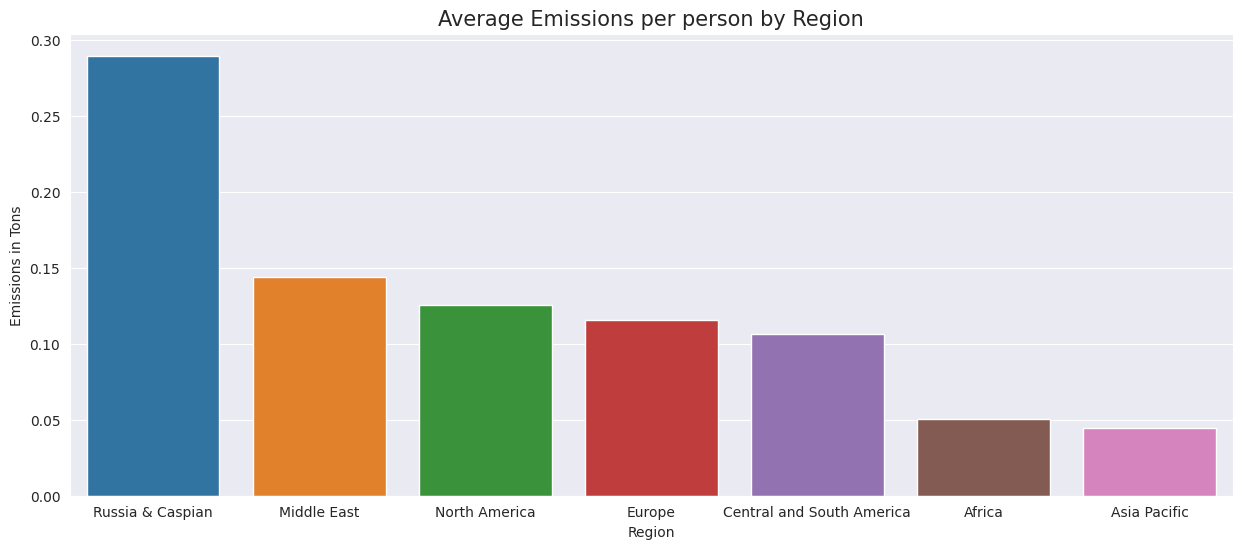

In [ ]:
#figure
plt.figure(figsize=(15, 6))
#labels
plt.title("Average Emissions per person by Region",fontsize=15);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
#barplot
sns.barplot(y=grouped_emission_population_av, x=grouped_emission_population_av.index);
plt.ylabel("Emissions in Tons",fontsize=10);
plt.xlabel("Region",fontsize=10);

**Russia ranks high on this list due to its large oil and gas industry and smaller population. The Middle East also has high methane emissions due to its climate, while North America's emissions are largely influenced by its oil and gas industries. On the other hand, Africa and Asia Pacific have lower methane emissions on average, partly due to the prevalence of countries with lower methane emissions in these regions.**

****

### Q5: What are the average emissions per country in each region?

In [ ]:
country_emission_region_average=pop_methane_df[pop_methane_df['region']!='Other']
#remove other section

In [ ]:
country_emission_region_average=(country_emission_region_average.groupby(['region'])['emissions'].sum()/country_emission_region_average.groupby('region')['country'].nunique())
#add up all emissions in the regions then divide by numbers of countries

In [ ]:
country_emission_region_average.sort_values(ascending=False,inplace=True)
#sort values

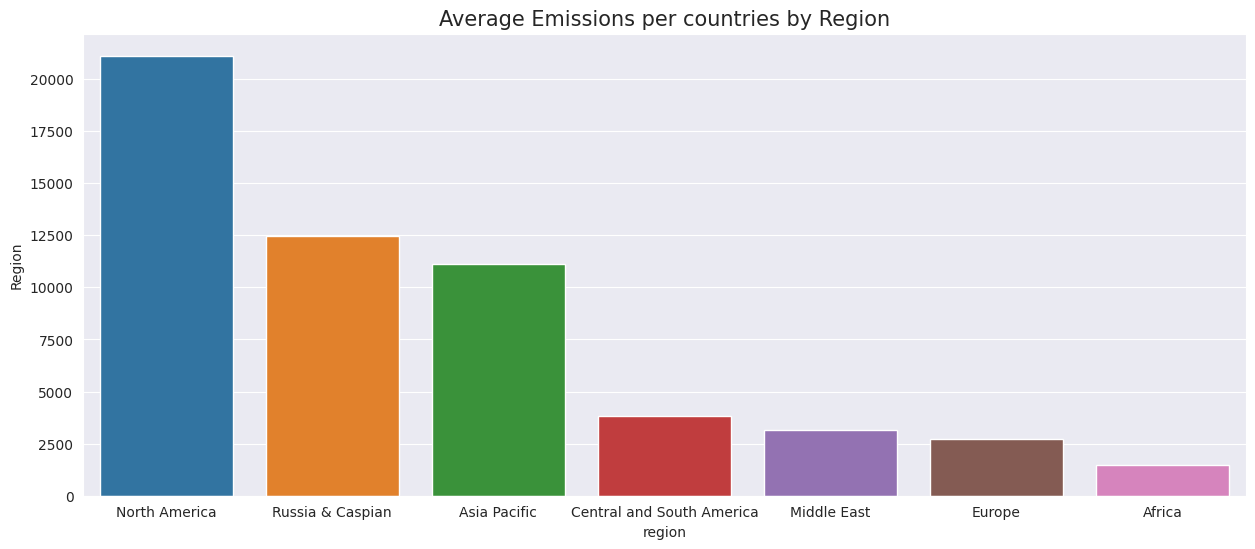

In [ ]:
#figure
plt.figure(figsize=(15, 6))
#labels
plt.xlabel("Emissions in Tons",fontsize=10);
plt.ylabel("Region",fontsize=10);
plt.title("Average Emissions per countries by Region",fontsize=15);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
#barplot
sns.barplot(y=country_emission_region_average, x=country_emission_region_average.index);

**It's worth noting that the number of countries within a region can have a significant impact on methane emission values. For example, North America has fewer countries compared to Africa, which has a greater number of countries. This can affect the average emission values per region, making it important to examine the data on a per-country basis to fully understand the situation."**

## Inferences and Conclusion

During the data analysis project, we discovered that methane emissions can vary widely from common perceptions of greenhouse gas emissions. For example, we observed lower than expected levels of emissions from Europe, high emissions per person in Middle Eastern countries, and surprisingly high emission rates from Africa. Our findings also revealed that energy production, particularly with gas and coal, is one of the highest emitters of methane, and agriculture surprisingly also contributes significantly to methane emissions. It is crucial to reduce methane emissions to mitigate the impact of climate change, given the high levels of emissions from these sectors.

## References and Future Work
 

**Ideas to try sometime else:** 


*   Carbon Emissions Instead of Methane
*   Total Emissions
*   Total Emissions Weighted on Severity 
*   Emissions Compared to GDP
*   Urbanization Percent to Emissions

**Some Reference links**


Pandas groupby function: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Pandas cumulative sum function:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html

Pandas iloc function:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

Seaborn lmplot function:
https://seaborn.pydata.org/generated/seaborn.lmplot.html

numpy corrcoef function:
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html